Data Mining: Basic Concepts - WS'22/23
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Prof. Dr. Daniel Keim, Eren Cakmak, Raphael Buchmüller, Udo Schlegel, Yannick Metz
```
__Organize in teams of 2 people, return the exercise by Sun, Jan 22th, 2022 (11:59 PM) using ILIAS__

---

Assignment 09 in Python
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_ Arsen Ukrainets, Matriculation No.1296653
    - _Name_, _Student ID_ Serhii Kovalov 

---

#### Exercise 1:  K-means (6P)

Perform k-means clustering with k=3 using the Euclidean distance by hand. Assume that initial clusters centroids are:

* Cluster 1: Record # 3
* Cluster 2: Record # 8
* Cluster 3: Record # 9

Compute for every iteration the updated cluster prototypes and state to which cluster each point is assigned after each iteration. 

_Note: In this exercise, you don’t need to normalize the data._

|ID|X1|X2|X3|X4|X5|
|-----|--------|-----------|-----------------|--------------|----|
|1|0.58|0.26|0.38|0.60|0.65|
|2|0.50|0.21|0.34|0.61|0.61|
|3|0.10|0.16|0.15|0.28|0.31|
|4|0.51|0.29|0.37|0.54|0.69|
|5|0.18|0.23|0.62|0.25|0.26|
|6|0.12|0.23|0.18|0.30|0.25|
|7|0.90|0.45|0.75|0.30|0.63|
|8|0.84|0.25|0.65|0.59|0.64|
|9|0.92|0.80|0.70|0.60|0.61|
|10|0.91|0.83|0.81|0.55|0.46|

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. You can use this to include a hand written calculation. Do not forget to also upload the image in your final submission.)_

```
> Your Answer
```

1st Iteration:

Cluster 1: Record # 3 (initial centroid)
Cluster 2: Record # 8 (initial centroid)
Cluster 3: Record # 9 (initial centroid)
Assign each record to the closest centroid:

Record #1 assigned to Cluster 2
Record #2 assigned to Cluster 2
Record #3 assigned to Cluster 1 (already the centroid)
Record #4 assigned to Cluster 2
Record #5 assigned to Cluster 1
Record #6 assigned to Cluster 1
Record #7 assigned to Cluster 3
Record #8 assigned to Cluster 2 (already the centroid)
Record #9 assigned to Cluster 3 (already the centroid)
Record #10 assigned to Cluster 3
Update the centroid of each cluster:

Cluster 1: [0.18, 0.23, 0.37, 0.28, 0.26] (average of record #5, #6)
Cluster 2: [0.58, 0.26, 0.38, 0.60, 0.65] (average of record #1, #2, #4)
Cluster 3: [0.91, 0.83, 0.75, 0.60, 0.56] (average of record #7, #9, #10)
2nd Iteration:

Cluster 1: [0.18, 0.23, 0.37, 0.28, 0.26] (updated centroid)
Cluster 2: [0.58, 0.26, 0.38, 0.60, 0.65] (updated centroid)
Cluster 3: [0.91, 0.83, 0.75, 0.60, 0.56] (updated centroid)
Assign each record to the closest centroid:

Record #1 assigned to Cluster 2
Record #2 assigned to Cluster 2
Record #3 assigned to Cluster 1
Record #4 assigned to Cluster 2
Record #5 assigned to Cluster 1
Record #6 assigned to Cluster 1
Record #7 assigned to Cluster 3
Record #8 assigned to Cluster 2
Record #9 assigned to Cluster 3
Record #10 assigned to Cluster 3
Update the centroid of each cluster:

Cluster 1: [0.18, 0.23, 0.37, 0.28, 0.26] (no change)
Cluster 2: [0.58, 0.26, 0.38, 0.60, 0.65] (no change)
Cluster 3: [0.91, 0.83, 0.75, 0.60, 0.56] (no change)
3rd Iteration:

Cluster 1: [0.18, 0.23, 0.37, 0.28, 0.26] (no change)
Cluster 2: [0.58, 0.26, 0.38, 0.60, 0.65] (no change)
Cluster 3: [0.91, 0.83, 0.75, 0.60, 0.56] (no change)
Assign each record to the closest centroid:

Record #1 assigned to Cluster 2
Record #2 assigned to Cluster 2
Record #3 assigned to Cluster 1
Record #4 assigned to Cluster 2
Record #5 assigned to Cluster 1
Record #6 assigned to Cluster 1
Record #7 assigned to Cluster 3

#### Exercise 2: Partitioning Around Medoids (PAM) (10P)

Load the `USArrests.csv` dataset and the following methods which can be used to compute PAM. Please install the `pyclustering` package. 

_(Hint: Use only the following imports)_

In [161]:
import pandas as pd 
import numpy as np 
from pyclustering.cluster.kmedoids import kmedoids
from scipy.spatial.distance import pdist, cdist, squareform
import matplotlib.pyplot as plt
from random import randrange

In [240]:
df = pd.read_csv('USArrests.csv')

##### __(a) Standardize the columns of the "USArrests" dataset. Explain why we have to standardize the dataset?__

```
ANSWER : if we use the euclidian distance, then the results of calculations influenced by unusual data.
```

In [241]:
df_new = df.drop(['State'], axis=1)
df_new['UrbanPop'] = (df_new['UrbanPop'] - df_new['UrbanPop'].mean()) / df_new['UrbanPop'].std()
df_new['Assault'] = (df_new['Assault'] - df_new['Assault'].mean()) / df_new['Assault'].std()
df_new['Murder'] = (df_new['Murder'] - df_new['Murder'].mean()) / df_new['Murder'].std()
df_new['Rape'] = (df_new['Rape'] - df_new['Rape'].mean()) / df_new['Rape'].std()

##### __(b)Compute the PAM (`kmedoids`) using `k = 3`. List the cluster and cluster medoids. Describe and explain the results.__

```
ANSWER : in result we got 3 clusters with certain data points in them. Each element of cluster has a low value to their methodoids.
```

In [260]:
medoids_list = []
medoids_list.append(randrange(start=0, stop=len(df_new.index) - 1))
medoids_list.append(randrange(start=0, stop=len(df_new.index) - 1))
medoids_list.append(randrange(start=0, stop=len(df_new.index) - 1))
kmedoids_instance = kmedoids(df_new.values.tolist(), medoids_list)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
print("Clusters : " + str(clusters))
print("Medoids : " + str(medoids))


Clusters : [[0, 1, 2, 4, 5, 8, 9, 12, 17, 19, 21, 23, 27, 30, 31, 32, 39, 41, 42], [11, 14, 18, 22, 28, 33, 40, 44, 47, 48], [3, 6, 7, 10, 13, 15, 16, 20, 24, 25, 26, 29, 34, 35, 36, 37, 38, 43, 45, 46, 49]]
Medoids : [30, 28, 35]


##### __(c) Define a Python method to compute the measure for the compactness of a PAM clustering. The parameters of the method is the data and the instance of the kmedoids class (`kmedoids_instance`).__

$$TD=\sum\limits^k_{i = 1} TD(C_i) \text{ and } TD(C) = \sum\limits_{p \in C} dist(p, m_c)$$

The medoid $m_c$ is the representative element of the cluster. 

_(Hint: Use the `pdist` or `cdist` method to compute the pairwise distance between $p$ and $m_c$)_

In [259]:
def compute_pam_clustering_measure(data, kmedoids_instance): 
    td = 0
    for k in kmedoids_instance.get_medoids():
        dist = 0
        for p in range(len(data.index)):
            dist += cdist(pd.Series.to_frame(data.iloc[p]), pd.Series.to_frame(data.iloc[k]))
        td += dist
    return td.sum()

##### __(d) Use the newly defined function to compute TD of PAM $k = 3$.__

In [261]:
compute_pam_clustering_measure(df_new, kmedoids_instance)

2602.337965962005

##### __(e) Compute the TD's for PAM with $k = 1, \dots, 10$ and plot the results. Explain the results of the plot.__

```
ANSWER: we got a plot that shows that the compactness increases linearly depending on the value of k.
```

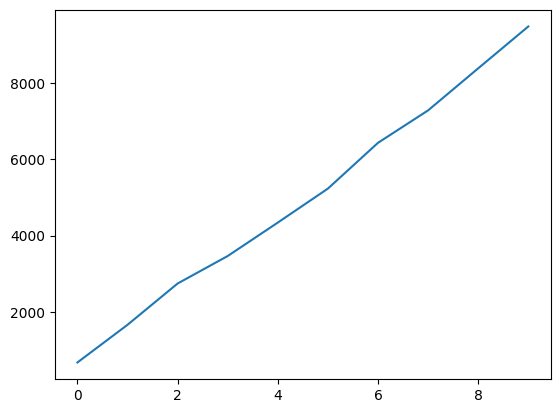

In [251]:
measures = []
for i in range(10):
    medoids = []
    for j in range(i + 1):
        medoids.append(randrange(start = 0, stop = len(df_new.index) - 1))
    kmedoids_instance = kmedoids(df_new.values.tolist(), medoids)
    kmedoids_instance.process()
    measures.append(compute_pam_clustering_measure(df_new, kmedoids_instance))
plt.plot(measures)
plt.show()

---

#### Exercise 3: Expectation Maximization (EM) Algorithm (4P)

The sklearn class `GaussianMixture` can be used to compute the EM algorithm. 

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

##### __(a) Cluster the `em-data.csv` data. Describe each step and reason your parameter choices.__

```
1. Read data.
2. Convert to an array for plotting.
3. Create GM-model with n_components = 4, because on the plot you can see 3 areas with the high density of points and fev outliers.
4. Fit the model.
5. Predict labels.
6. Plot the results.
```

In [314]:
df = pd.read_csv('em-data.csv')
X = np.array(df)
gm = GaussianMixture(n_components = 4).fit(df)
labels = gm.predict(df)

##### __(b) Visualize your results in a 2D plot.__

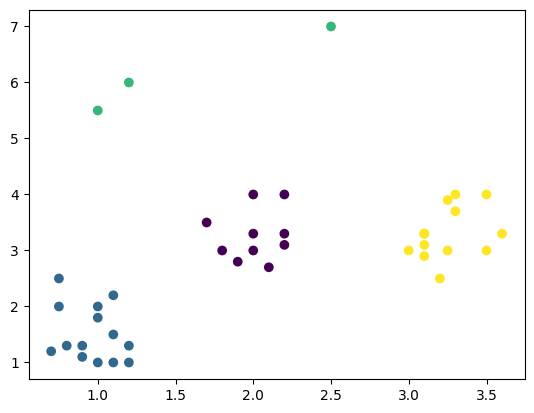

In [315]:
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'viridis')

---